# Entropy and feature importance

The Jensen-Shannon (JS) divergence is a measure of similarity between two probability distributions. It is a symmetric and finite measure that addresses some limitations of the Kullback-Leibler (KL) divergence, such as its asymmetry and potential to be infinite. Here’s a breakdown of how to interpret the JS divergence:

The JS divergence ranges from 0 to 1 when using the base-2 logarithm. A value of 0 indicates that the two distributions are identical, while higher values indicate greater dissimilarity. Unlike the KL divergence, the JS divergence is symmetric: $JS(p || q) = JS(q || p)$.


- **JS Divergence = 0**: The two distributions are identical.
- **JS Divergence > 0 and close to 0**: The two distributions are very similar.
- **JS Divergence < 1 but far from 0**: The distributions have some significant differences.
- **JS Divergence = 1**: The two distributions are completely dissimilar in the regions where they have positive probability mass.


Suppose we have two distributions, \( P \) and \( Q \), representing the feature importance distribution comparing with equal weights feature importance.

- If the JS divergence is 0, the distributions are identical, indicating that features have the same importance

- If the JS divergence is close to 0, the distributions are very similar, suggesting that the features have similar importance

- If the JS divergence is far from 0, the distributions have significant differences, implying that the features have different importance

In [1]:
import sys

sys.path.insert(0, "/home/cristian/holisticai/src")

KL Divergence: 0.8725590420520595
Jensen-Shannon Divergence: 0.5908490495385915
Entropy Ratio: 0.8315927555355627


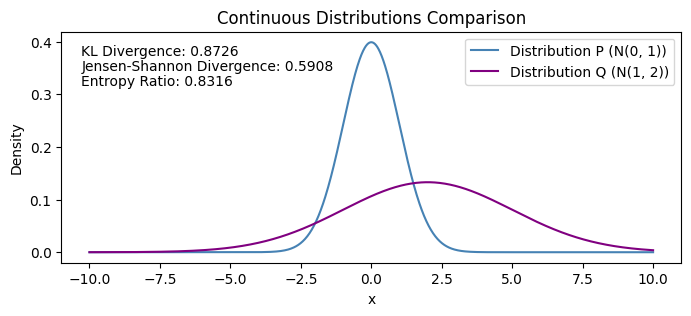

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy, norm
from scipy.spatial.distance import jensenshannon

def jensen_shannon_divergence(p, q):
    """Calculate Jensen-Shannon divergence between two distributions."""
    return jensenshannon(p, q, base=2)

def entropy_ratio(p, q):
    """Calculate the ratio of entropies of two distributions."""
    return entropy(p) / entropy(q)

x = np.linspace(-10, 10, 1000)
p = norm.pdf(x, loc=0, scale=1)
q = norm.pdf(x, loc=2, scale=3)

kl_div = entropy(p, q)
js_div = jensen_shannon_divergence(p, q)
entropy_rat = entropy_ratio(p, q)

print(f"KL Divergence: {kl_div}")
print(f"Jensen-Shannon Divergence: {js_div}")
print(f"Entropy Ratio: {entropy_rat}")

plt.figure(figsize=(8, 3)) 
plt.plot(x, p, label='Distribution P (N(0, 1))', color='steelblue')
plt.plot(x, q, label='Distribution Q (N(1, 2))', color='purple')

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Continuous Distributions Comparison')
plt.legend()

plt.figtext(0.15, 0.80, f"KL Divergence: {kl_div:.4f}", fontsize=10)
plt.figtext(0.15, 0.75, f"Jensen-Shannon Divergence: {js_div:.4f}", fontsize=10)
plt.figtext(0.15, 0.70, f"Entropy Ratio: {entropy_rat:.4f}", fontsize=10)

plt.show()